### This notebook compile sky coverage for each catalogues

In [22]:
# One can refer to https://github.com/cds-astro/mocpy/blob/master/notebooks for details on how to use mocpy.
import matplotlib.pyplot as plt
import mocpy
from mocpy import MOC
from mocpy import WCS as WCS_mocpy
from astropy.coordinates import Angle, SkyCoord
from astropy.io import fits
from astropy import units as u
from astropy.visualization.wcsaxes.frame import EllipticalFrame
# from astropy.wcs import WCS
from astroquery.vizier import Vizier
from astropy.table import Table
from matplotlib import patheffects

print(mocpy.__version__)

0.18.0


In [60]:
table_path1 = "tmp_sdss.fits"
# make the
table_sdss = Table.read(table_path1)
table_first = Table.read("tmp_first.fits")
# make the moc
aa = table_sdss["RA"].T * u.deg
aa.unit

Unit("deg")

In [61]:

moc = MOC.from_lonlat(
    table_sdss["RA"].T * u.deg,
    table_sdss["DEC"].T * u.deg,
    max_norder=6,
)
label = "sdss"
color = "blue"

In [116]:
def set_up(fig,center_ra=12,center_dec=0,fov=160):
    with WCS_mocpy(fig,
                fov= fov * u.deg,
                center=SkyCoord(center_ra*15, center_dec, unit="deg", frame="icrs"),
                coordsys="icrs",
                rotation=Angle(0, u.degree),
                projection="AIT") as wcs: wcs=wcs
    ax1 = fig.add_subplot(1,1,1,projection=wcs, frame_class=EllipticalFrame)
    return wcs,ax1

#This definition is for a kind of ploting, WCS are from mocpy
def plot_coverage(moc,wcs,ax,label,alpha,ecolor,fcolor,fill=True):
    moc.fill(
        ax=ax,
        wcs=wcs,
        edgecolor=ecolor,
        facecolor=fcolor,
        linewidth=1 if fill else 0,
        fill=fill,
        alpha=alpha,
        label=label
        )
    moc.border(ax=ax, wcs=wcs, color=ecolor, alpha=0.5)
    # path_effects = [patheffects.withStroke(linewidth=2, foreground=ecolor)]
    # ax.coords[0].set_ticklabel(color="white", path_effects=path_effects)

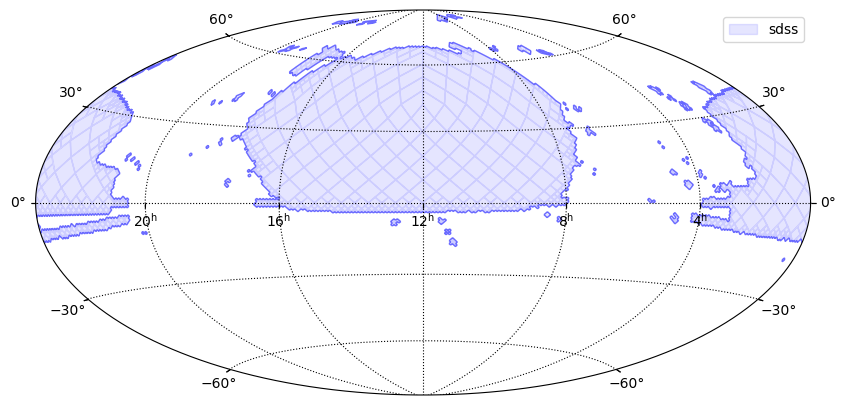

In [117]:
#####can change the center and the scale of the celestial coordinate system
set_scale = 0 #set 1 to turn on
center_ra = 12 # in hours, from 0 to 24 h
center_dec = 0 # in degrees, from -90 to 90 deg
scale = 60 # field of view in degrees, usually 160 is for the whole sphere
#######################################################
fig1 = plt.figure(figsize=(10, 5))
if set_scale == 1:
    wcs1,ax1=set_up(fig1,center_ra,center_dec,scale)
else:
    wcs1,ax1=set_up(fig1)
ecolor = color
fcolor = color
plot_coverage(moc,wcs1,ax1,label,0.1,ecolor,fcolor)



plt.legend()
plt.grid(color="black", linestyle="dotted")
#plt.savefig('tst.png',format='png',dpi=300)
plt.show()

[3.27481604 3.09703493 3.865      ... 3.145      3.065      3.771     ]


/var/folders/71/gshyfsc16lv27mjb4j1d21000000gn/T/ipykernel_58682/197682809.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('rainbow')  # You can choose any colormap


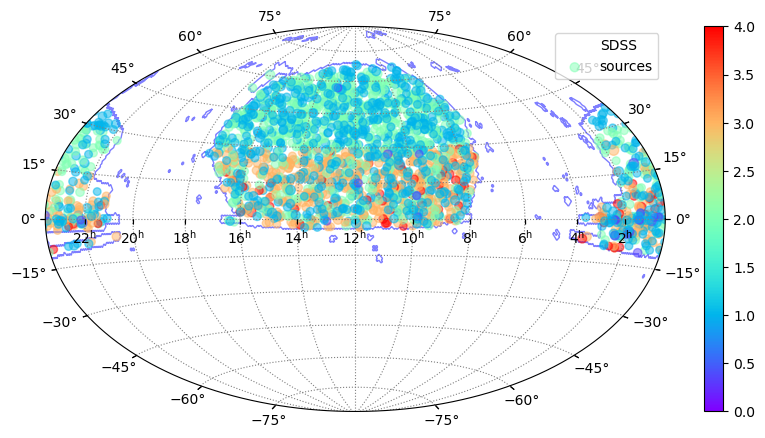

In [119]:
table_path = "tmp_sdss.fits"
# make the
table_sdss = Table.read(table_path)


moc = MOC.from_lonlat(
    table_sdss["RA"].T * u.deg,
    table_sdss["DEC"].T * u.deg,
    max_norder=6,
)
label = "sdss"
color = "blue"

def gen_moc_from_table(fits_table,ra_col,dec_col, max_norder=6):
    """
    Generate a MOC from a table with RA and DEC columns.
    """
    data_table = Table.read(fits_table)
    ra = data_table[ra_col]
    dec = data_table[dec_col]
    if ra.unit is u.deg:
        ra = ra.T
        dec = dec.T
    else:
        ra = ra.T * u.deg
        dec = dec.T * u.deg
    moc = MOC.from_lonlat(
        ra,
        dec,
        max_norder=max_norder,
    )
    return moc

##### overall settings for the plot
#####can change the center and the scale of the celestial coordinate system
set_scale = 1 #set 1 to turn on
center_ra = 12 # in hours, from 0 to 24 h
center_dec = 0 # in degrees, from -90 to 90 deg
scale = 160 # field of view in degrees, usually 160 is for the whole sphere
##################################################
##survey moc setting for single surveys##
moc_sdss = gen_moc_from_table("tmp_sdss.fits", "RA", "DEC", max_norder=6)
label_sdss = "SDSS"; ecolor_sdss = "blue"; fcolor_sdss = "white"

moc_first = gen_moc_from_table("tmp_first.fits", "RA_deg", "DEC_deg", max_norder=6)
label_first = "FIRST"; ecolor_first = "blue"; fcolor_first = None

moc_nvss = gen_moc_from_table("tmp_nvss.fits", "RA_deg", "DEC_deg", max_norder=6)
label_nvss = "NVSS"; ecolor_nvss = "green"; fcolor_nvss = None

moc_gleam = gen_moc_from_table("tmp_gleam.fits", "RA_deg", "DEC_deg", max_norder=6)
label_gleam = "GLEAM"; ecolor_gleam = "red"; fcolor_gleam = None

moc_racs = gen_moc_from_table("tmp_racs.fits", "RA_deg", "DEC_deg", max_norder=6)
label_racs = "RACS"; ecolor_racs = "purple"; fcolor_racs = None


##################################################   
fig1 = plt.figure(figsize=(10, 5))
if set_scale == 1:
    wcs1,ax1=set_up(fig1,center_ra,center_dec,scale)
else:
    wcs1,ax1=set_up(fig1)

plot_coverage(moc_sdss,wcs1,ax1,label_sdss,1,ecolor_sdss,fcolor_sdss,fill=False)
# plot_coverage(moc_first,wcs1,ax1,label_first,0.3,ecolor_first,fcolor_first)
# plot_coverage(moc_nvss,wcs1,ax1,label_nvss,0.3,ecolor_nvss,fcolor_nvss)
# plot_coverage(moc_gleam,wcs1,ax1,label_gleam,ecolor_gleam,fcolor_gleam)
# plot_coverage(moc_racs,wcs1,ax1,label_racs,0.3,ecolor_racs,fcolor_racs)




import pandas as pd
df_hz=pd.read_csv("../final_matched_highz_catalogue.csv")
#make a subset of the dataframe where when sdss_z >5, its sdss_source_z not PIPE
df_bad = df_hz[(df_hz['sdss_z'] >= 5) & (df_hz['sdss_source_z'] == 'PIPE')]
df_hzgz = df_hz[~df_hz.index.isin(df_bad.index)]
# df_hzgz = df_hz[df_hz['sdss_source_z'] != 'PIPE']
tier_scores = []
source_redshift = df_hzgz["sdss_z"].values
print(source_redshift)
for i, row in df_hzgz.iterrows():
    # for values that are not 1,2,3 from the rows, set them to 999
    if row["source_tier_first"] not in [1, 2, 3]:
        row["source_tier_first"] = 999
    if row["source_tier_nvss"] not in [1, 2, 3]:
        row["source_tier_nvss"] = 999
    if row["source_tier_gleam"] not in [1, 2, 3]:
        row["source_tier_gleam"] = 999
    if row["source_tier_racs"] not in [1, 2, 3]:
        row["source_tier_racs"] = 999   
    score = 1/row["source_tier_first"] + 1/row["source_tier_nvss"] + 1/row["source_tier_gleam"] + 1/row["source_tier_racs"]
    tier_scores.append(score)
# make a color bar and scatter plot, the color is based on the tier scores (not normalize, from min to max) and the size is based on the redshift
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize 
norm = Normalize(vmin=0, vmax=4)
cmap = cm.get_cmap('rainbow')  # You can choose any colormap
# Normalize the tier scores to the range of the colormap
colors = cmap(norm(tier_scores))
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1, orientation='vertical')
sizes = 10 * source_redshift  # Adjust size based on redshift
# scatter plot
ax1.scatter(df_hzgz["sdss_ra"], df_hzgz["sdss_dec"],transform=ax1.get_transform('icrs'),
            color=colors, s=sizes, label="sources", alpha=0.5,marker='o')   

# colors = cmap(tier_scores)
# sizes = 10 * source_redshift  # Adjust size based on redshift
# # scatter plot
# ax1.scatter(df_hzgz["sdss_ra"], df_hzgz["sdss_dec"],transform=ax1.get_transform('icrs'),
#             color=colors, s=sizes, label="sources", alpha=0.5,marker='o')



plt.legend()
ax1.coords.grid(True, color='gray', linestyle='dotted')

# 设置经线和纬线的数量
ax1.coords[0].set_ticks(number=12)  # 经线
ax1.coords[1].set_ticks(number=12)   # 纬线
# plt.grid(color="black", linestyle="dotted")
#plt.savefig('tst.png',format='png',dpi=300)
plt.show()

In [ ]:
import pandas as pd
df_hz=pd.read_csv("../final_matched_highz_catalogue.csv")
#make a subset of the dataframe where when sdss_z >5, its sdss_source_z not PIPE
df_bad = df_hz[(df_hz['sdss_z'] >= 5) & (df_hz['sdss_source_z'] == 'PIPE')]
df_hzgz = df_hz[~df_hz.index.isin(df_bad.index)]
# df_hzgz = df_hz[df_hz['sdss_source_z'] != 'PIPE']
tier_scores = []
source_redshift = df_hzgz["source_redshift"]
for i, row in df_hzgz.iterrows():
    score = 1/row["source_tier_first"] + 1/row["source_tier_nvss"] + 1/row["source_tier_gleam"] + 1/row["source_tier_racs"]
    tier_scores.append(score)
# make a color bar and scatter plot, the color is based on the tier scores and the size is based on the redshift

ax1.scatter(df_hzgz["sdss_ra"], df_hzgz["sdss_dec"],transform=ax1.get_transform('icrs'),
            color="k", s=10, label="sources", alpha=0.5,marker='o')